In [5]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [6]:
# duration
start = datetime.date(1990,1,1)
end = datetime.date.today()

# ticker
codelist=["^GSPC","^VIX"]
# display name
displist=["S&P500","VIX"]

# get data
data_stock = yf.download(codelist, start=start, end=end)["Adj Close"]

# data_stock.to_csv("VIX.csv")
# data_stock = pd.read_csv("VIX.csv", index_col=["Date"], parse_dates=True)

[*********************100%%**********************]  2 of 2 completed


VIX generally rises when markets are in turmoil or when the economy is in a downturn. On the other hand, when stock prices are rising and no major fluctuations are expected, the VIX index tends to decline or remain stable at low levels. In other words, the VIX index is negatively correlated with stock price movements.

For example, in March 2020, when market sentiment deteriorated following the spread of the new coronavirus, the VIX index rose to a record high of 82.69.

The value of the VIX can be used to infer investor sentiment.

0–15
Generally, the market is optimistic

15–20
Generally indicates market conditions are normal

20–25
Generally indicates increasing market concern

25–30
Generally indicates market turmoil

30+
Generally indicates that the market is very turbulent

Now we check the proportion of each VIX value range.

In [7]:
# probability of each VIX value range
data_stock[codelist[1]].value_counts(bins=[0, 15, 20, 25, 30, 100], normalize=True)

(-0.001, 15.0]    0.331070
(15.0, 20.0]      0.292699
(20.0, 25.0]      0.199208
(25.0, 30.0]      0.095529
(30.0, 100.0]     0.081494
Name: proportion, dtype: float64

Draw a time-series plot of the VIX and the S&P 500 simultaneously to see how stock prices move when the VIX soars.

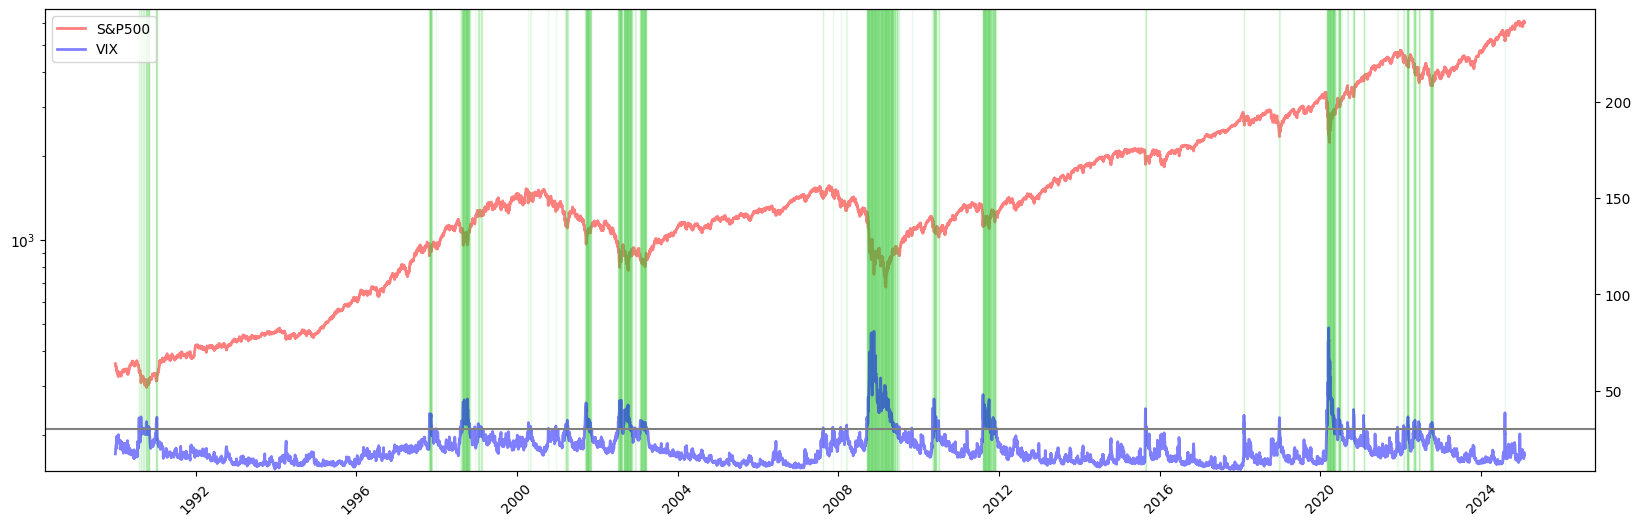

In [12]:
vix_num=30
fig, ax1 = plt.subplots(figsize=(20, 6),facecolor="white")


ax2 = ax1.twinx()

ax1.plot(data_stock[codelist[0]].dropna(),
color="red", label=displist[0],linewidth=2,alpha=0.5)

ax2.plot(data_stock[codelist[1]].dropna(),
color="blue", label=displist[1],linewidth=2,alpha=0.5)

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.5)

ax1.tick_params(axis='x', labelrotation=45)
ax1.set_yscale("log") 
ax1.set_ylim(data_stock[codelist[0]].min()*0.5,data_stock[codelist[0]].max()*1.1)
ax2.set_ylim(data_stock[codelist[1]].min()*0.9,data_stock[codelist[1]].max()*3.0)

ax2.axhline(y=vix_num, color="gray")

df=data_stock[data_stock[codelist[1]] >= vix_num]
for item in df.index:
  ax1.axvline(item,color='limegreen',linewidth=1 ,alpha=0.1)

plt.show()

In [13]:
data_stock.tail(1)['^GSPC'].values / df.tail(1)['^GSPC'].values 
# output: array([1.12819665])

array([1.16492584])

We will examine the performance of the S&P 500 in a similar manner for the 722 days that the VIX has been above 30 so far. In the following, we calculate the performance of S&P500 one year after the day when VIX was over 30.

In [14]:
# 1 years later of date when VIX > 30
one_year_later = df.index + datetime.timedelta(days=365)
i = 0
one_year_later_adjusted = []
def check_date(date, trial=0):
  if not date in data_stock.index:
    if trial <= 4:
      return check_date(date + datetime.timedelta(days=1), trial + 1)
  else:
    return date
for d in one_year_later:
  d = check_date(d)
  if d:
    one_year_later_adjusted.append(d)

performance_one_year_later = data_stock.loc[one_year_later_adjusted]['^GSPC'].values / df.head(len(one_year_later_adjusted))['^GSPC'].values


pd.DataFrame(pd.Series(performance_one_year_later.ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,721.0,1.221243,0.183209,0.585255,1.155112,1.224421,1.32813,1.747797


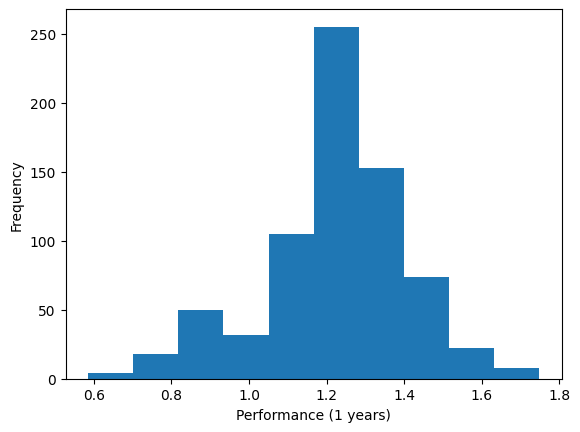

In [15]:
plt.hist(performance_one_year_later, bins=10)
plt.ylabel("Frequency")
plt.xlabel("Performance (1 years)")
plt.show()

Surprisingly, an average return of 22.1% can be expected. The maximum return is 74. 7%, and the maximum loss is -41.5%.